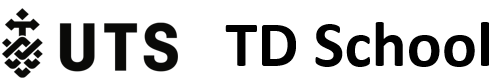

### Assessment 2: Predicting Customer Churn in the Telecommunications Industry Using Machine Learning Models

**Name:** Valeria Roman 

**Course:** Advanced Data Analytics Algorithms, Machine Learning - Spring 2024

This project aims to build a  model that predicts whether a customer is likely to churn (i.e., stop using the services of a telecom company). By analysing customer demographics, service usage patterns, and customer support interactions, the model will help identify at-risk customers and enable proactive retention strategies.

The libraries shown below were used in the resolution of the research project.

#### 0 - Libraries

In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import joblib
import os

# To handle date
from datetime import datetime

pd.set_option('display.max_colwidth', None)

pd.set_option('display.max_columns', None)

# For the models I'm going to apply
from sklearn.model_selection import train_test_split
import statistics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

Data Dictionary

| **Column Name**             | **Description**                                                                                         | **Data Type** |
|-----------------------------|---------------------------------------------------------------------------------------------------------|---------------|
| `customerID`                | Unique identifier for each customer.                                                                     | String        |
| `gender`                    | Gender of the customer (Male, Female).                                                                   | Categorical   |
| `SeniorCitizen`             | Indicates if the customer is a senior citizen (1: Yes, 0: No).                                           | Integer       |
| `Partner`                   | Whether the customer has a partner (Yes, No).                                                            | Categorical   |
| `Dependents`                | Whether the customer has dependents (Yes, No).                                                           | Categorical   |
| `tenure`                    | Number of months the customer has stayed with the company.                                                | Integer       |
| `PhoneService`              | Whether the customer has phone service (Yes, No).                                                        | Categorical   |
| `MultipleLines`             | Whether the customer has multiple phone lines (Yes, No, No phone service).                               | Categorical   |
| `InternetService`           | Customer’s internet service provider (DSL, Fiber optic, No).                                             | Categorical   |
| `OnlineSecurity`            | Whether the customer has online security add-ons (Yes, No, No internet service).                         | Categorical   |
| `OnlineBackup`              | Whether the customer has online backup service (Yes, No, No internet service).                           | Categorical   |
| `DeviceProtection`          | Whether the customer has device protection (Yes, No, No internet service).                               | Categorical   |
| `TechSupport`               | Whether the customer has tech support service (Yes, No, No internet service).                            | Categorical   |
| `StreamingTV`               | Whether the customer has a streaming TV service (Yes, No, No internet service).                          | Categorical   |
| `StreamingMovies`           | Whether the customer has a streaming movie service (Yes, No, No internet service).                       | Categorical   |
| `Contract`                  | The contract term of the customer (Month-to-month, One year, Two year).                                  | Categorical   |
| `PaperlessBilling`          | Whether the customer has paperless billing (Yes, No).                                                    | Categorical   |
| `PaymentMethod`             | The payment method the customer uses (Electronic check, Mailed check, Bank transfer, Credit card).        | Categorical   |
| `MonthlyCharges`            | The monthly amount charged to the customer.                                                              | Float         |
| `TotalCharges`              | The total amount charged to the customer.                                                                | Float         |
| `Churn`                     | Whether the customer has churned (Yes, No).                                                              | Categorical   |

#### 1 - Open the file

The file will be read as a csv file using the pandas library. 

In [3]:
file_path = '../data/Telco_customer_churn.csv'
df_original = pd.read_csv(file_path)
df_original

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### 2 - Initial Data Exploration

From the dataset we can remove for now 'customerID' because is a unique ID that doesn't provide meaningful information to the analysis.


In [4]:
df = df_original.copy(deep=True)

In [5]:
df = df.drop(columns=['customerID'])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


We are going to use descriptive statistics to understand the properties of the dataset.

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We will now investigate each of the attribute types contained in the dataset. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Analysing the previous result, we notice that the column 'TotalCharges' does not have the right type, so we are going to transform it.

In [8]:
# STEP 1 -> First it's important to strip any leading/trailing spaces and convert empty values to NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

# STEP 2 -> Now we are going to convert with this line of code the 'TotalCharges' column to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### 3 - Data Quality Check

Monitoring the data quality is a critical step in this project, as it ensures that the dataset is accurate, complete, and consistent, which is essential to building reliable models that yield meaningful results that align correctly with the overall objective set out at the beginning. In addition, performing this step helped us to avoid common pitfalls, such as incorrect results or biased predictions, by ensuring the integrity of the data at every step of the analysis process.

**a). Null Check**

In [10]:
null_counts = df.isnull().sum()
 
null_percentage = (df.isnull().sum() / len(df)) * 100

null_info = pd.DataFrame({'Null_Counts': null_counts, 'Percentage': null_percentage})
 
print(null_info)

                  Null_Counts  Percentage
gender                      0    0.000000
SeniorCitizen               0    0.000000
Partner                     0    0.000000
Dependents                  0    0.000000
tenure                      0    0.000000
PhoneService                0    0.000000
MultipleLines               0    0.000000
InternetService             0    0.000000
OnlineSecurity              0    0.000000
OnlineBackup                0    0.000000
DeviceProtection            0    0.000000
TechSupport                 0    0.000000
StreamingTV                 0    0.000000
StreamingMovies             0    0.000000
Contract                    0    0.000000
PaperlessBilling            0    0.000000
PaymentMethod               0    0.000000
MonthlyCharges              0    0.000000
TotalCharges               11    0.156183
Churn                       0    0.000000


As we can see above, we only have one column with a few percentage of null values. Since we have only 0.1561% of null values in the TotalCharges column we can drop them.

In [11]:
df = df.dropna(subset=['TotalCharges'])

In [12]:
null_counts = df.isnull().sum()
 
null_percentage = (df.isnull().sum() / len(df)) * 100

null_info = pd.DataFrame({'Null_Counts': null_counts, 'Percentage': null_percentage})
 
print(null_info)

                  Null_Counts  Percentage
gender                      0         0.0
SeniorCitizen               0         0.0
Partner                     0         0.0
Dependents                  0         0.0
tenure                      0         0.0
PhoneService                0         0.0
MultipleLines               0         0.0
InternetService             0         0.0
OnlineSecurity              0         0.0
OnlineBackup                0         0.0
DeviceProtection            0         0.0
TechSupport                 0         0.0
StreamingTV                 0         0.0
StreamingMovies             0         0.0
Contract                    0         0.0
PaperlessBilling            0         0.0
PaymentMethod               0         0.0
MonthlyCharges              0         0.0
TotalCharges                0         0.0
Churn                       0         0.0


**b).  Duplicate Rows**

In [13]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 22


In [14]:
df = df.drop_duplicates()

**c). Outliers Identification**

In [15]:
len(df)

7010

In [16]:
outliers_dict = {}

for column in df.select_dtypes(include=['number']).columns:
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    outliers = z_scores > 4
    outliers_dict[column] = outliers.sum()

outliers_df = pd.DataFrame(list(outliers_dict.items()), columns=['Column', 'Outliers'])

print(outliers_df)

           Column  Outliers
0   SeniorCitizen         0
1          tenure         0
2  MonthlyCharges         0
3    TotalCharges         0


We can notice that we do not have any outliers in the dataset.

On the other hand, it is important to look at the distribution of the numerical variables.

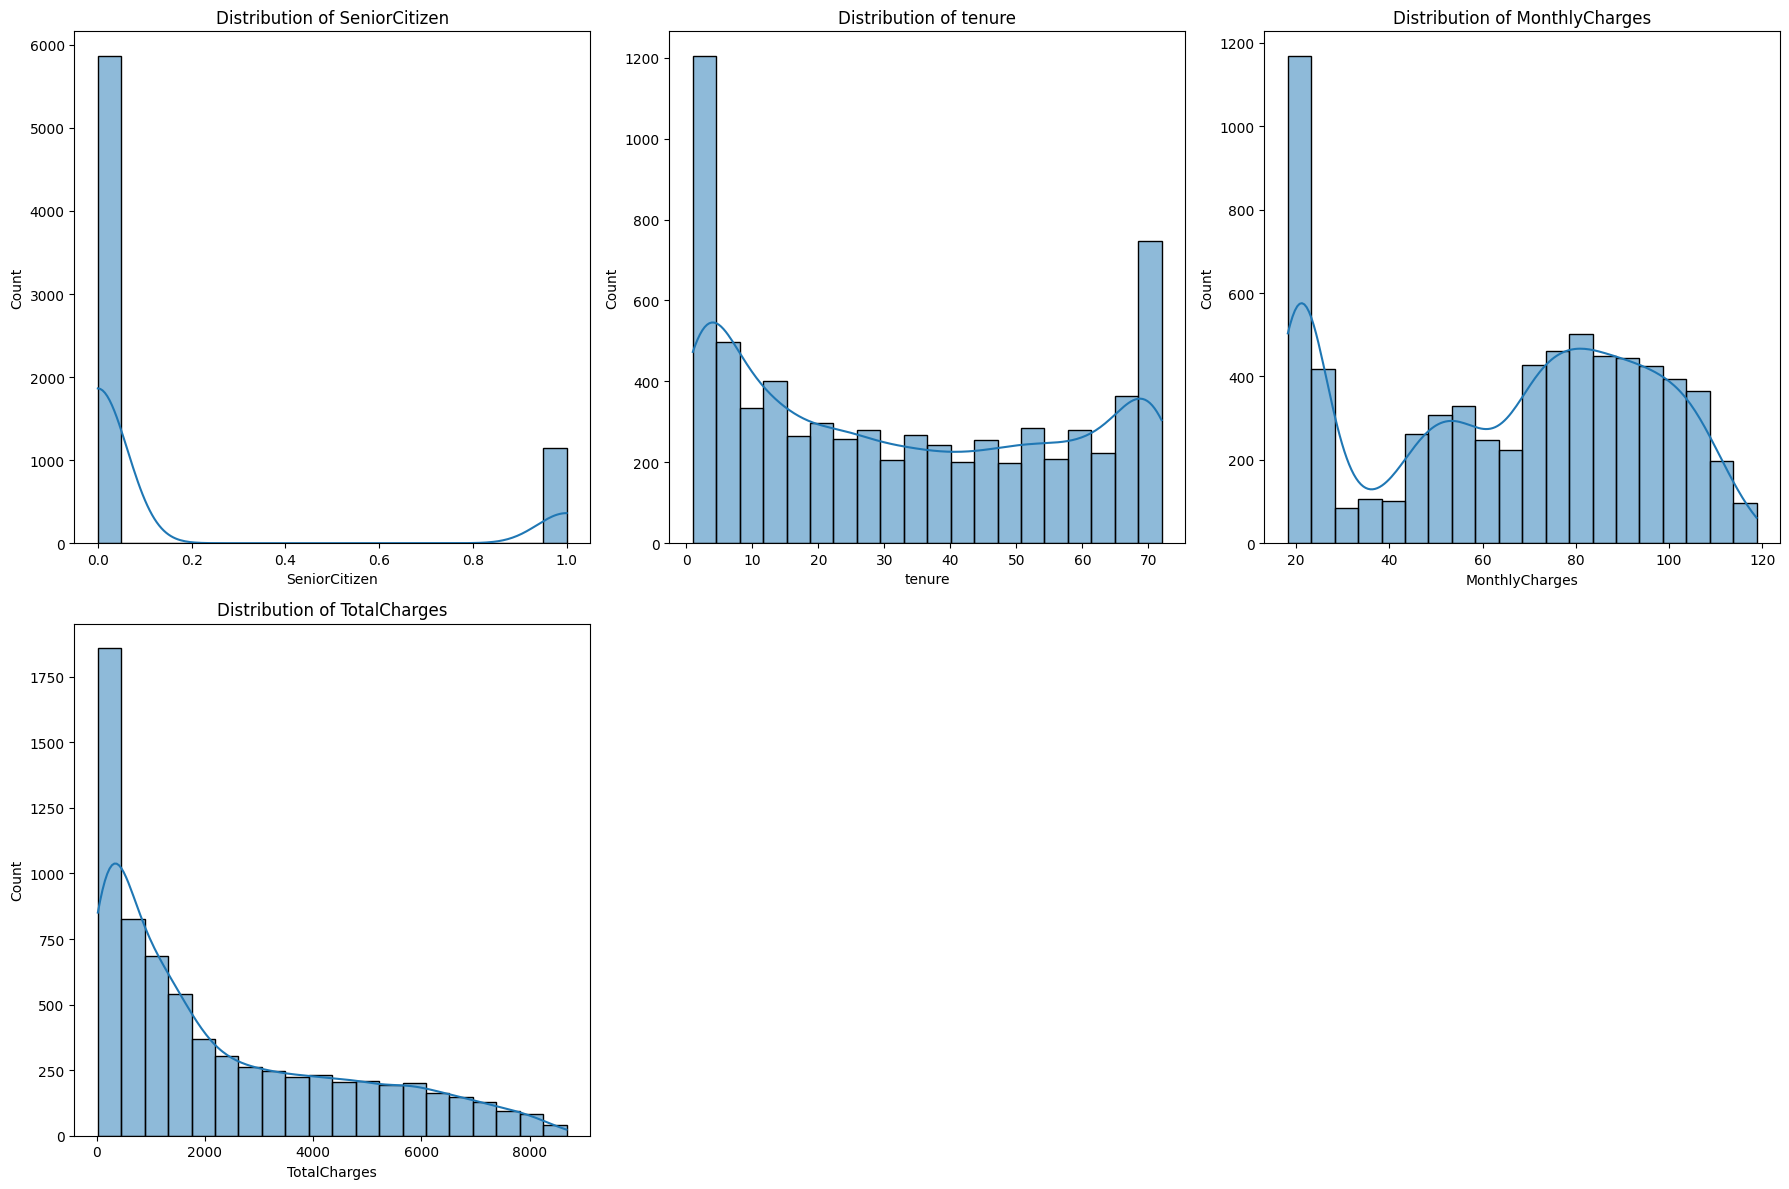

In [17]:
# STEP 1 -> First we need to define the numerical columns
columns_of_interest = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# STEP 2 -> Now we are going to calculate the number of tows needed for the plot grid
n_rows = len(columns_of_interest) // 3 + (len(columns_of_interest) % 3 > 0)

plt.figure(figsize=(18, 6 * n_rows))

# STEP 3 -> In this 'for' cycle we are going to loop through the numerical columns and plot their distributions
for i, col in enumerate(columns_of_interest, 1):
    plt.subplot(n_rows, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()

plt.show()

From the graph we can see that: 

- SeniorCitizen is a binary variable (0 to 1 ) with a much higher concentration of customers being non-senior citizens (0).

- The tenure distribution is not uniform. There are spikes at very low (close to 0) and very high tenure values, indicating that some customers have just joined the service or have been with the company for a long time.

- The monthly charges distribution is uniform across mid-to-high values, with a high concentration around lower values (around 20).

- The distribution of TotalCharges is right-skewed, meaning most customers have relatively low total charges.

**d). Heat Map**

To see the relationship between multiple attributes, I'm going to make a correlation map.

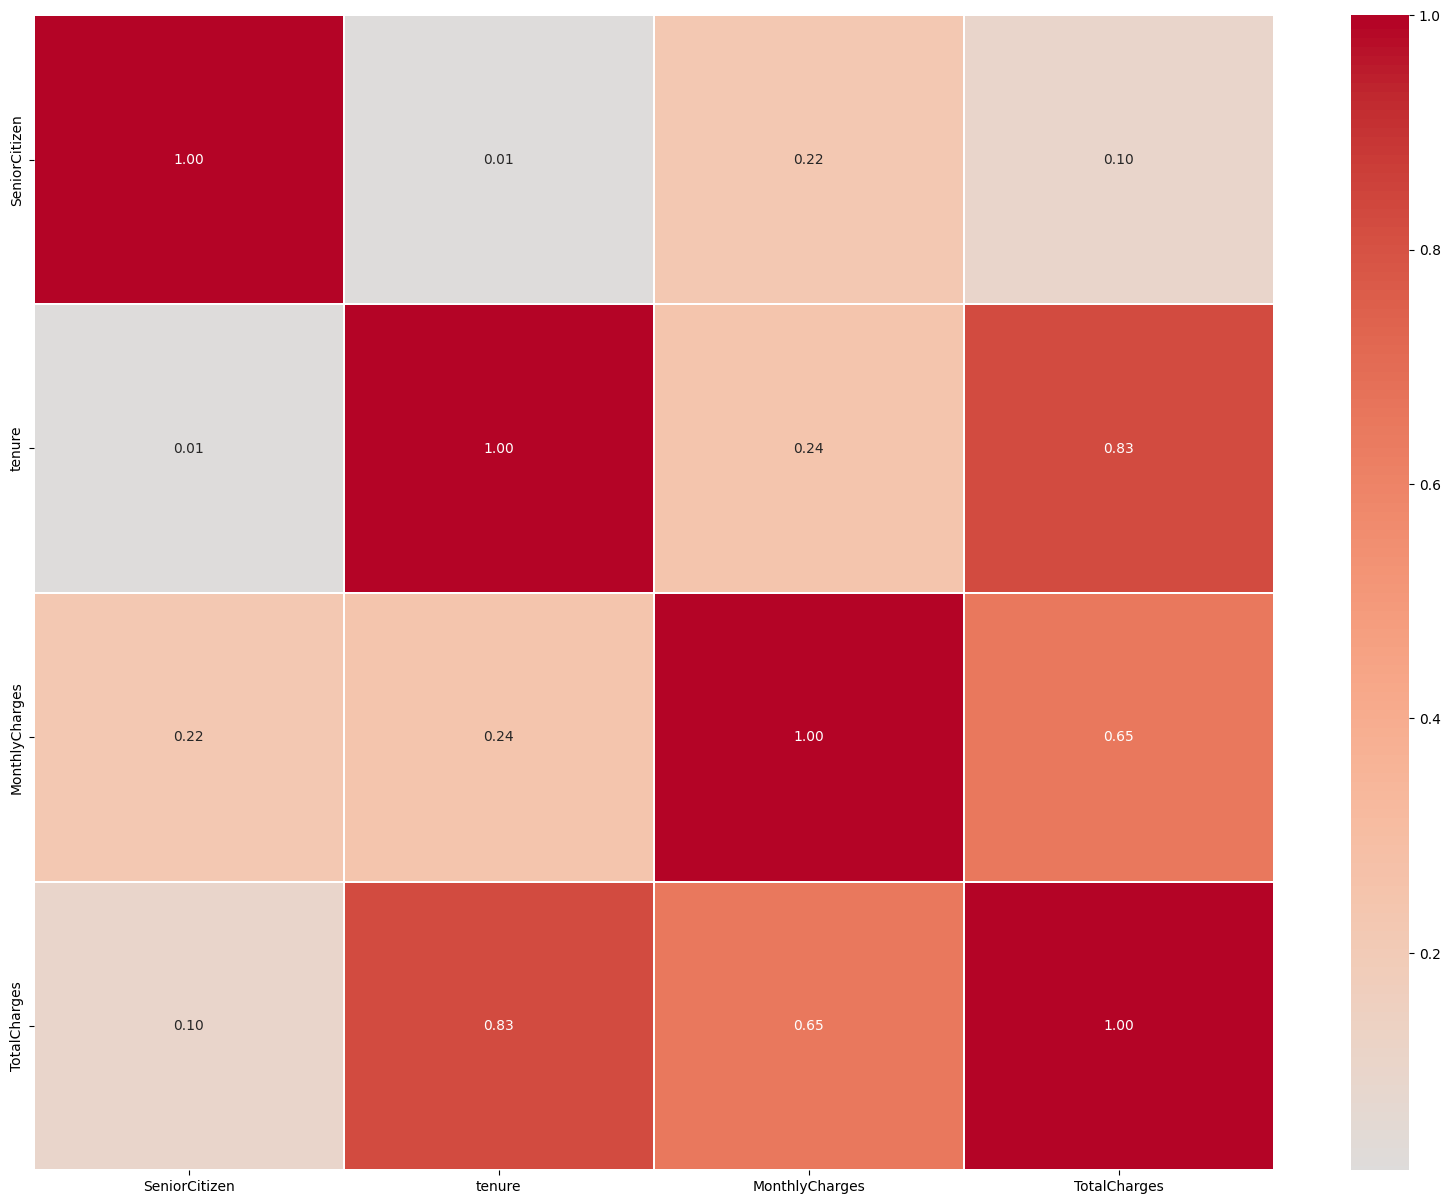

In [18]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

corr = df[numeric_cols].corr()
f, ax = plt.subplots(figsize=(20, 15))

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=.3, fmt=".2f")

plt.show()

In [19]:
# STEP 1 -> First we are going to calculate the correlation matrix for the numerical columns in the DataFrame.
correlation_matrix = df[numeric_cols].corr()

# STEP 2 -> We set a threshold of 0.6, meaning that only variables pairs with a correlation greater than this will be considered as "highly correlated."
threshold = 0.60

correlated_pairs = []

# STEP 3 -> We set a loop that goes through all the pairs of variables and the ones highly correlated, the loop added to the list. 
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

correlated_text = ""
for pair in correlated_pairs:
    correlated_text += f"{pair[0]} and {pair[1]} are correlated.\n"

print("Correlated variables:")
print(correlated_text)

Correlated variables:
tenure and TotalCharges are correlated.
MonthlyCharges and TotalCharges are correlated.



From the result we can see that TotalCharges is highly correlated with both tenure and MonthlyCharges and when two or more variables are highly correlated that means they have similar information, and this could lead to multicollinearity in some machine learning models that's why we can remove TotalCharges to avoid redundancy. 

In [20]:
df = df.drop('TotalCharges', axis=1)

In [21]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes


#### 4 - Selection of numerical variables

In [22]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

variance = df[numeric_cols].var()
sorted_variances = variance.sort_values()
print(sorted_variances)

SeniorCitizen       0.136294
tenure            601.252045
MonthlyCharges    903.890316
dtype: float64


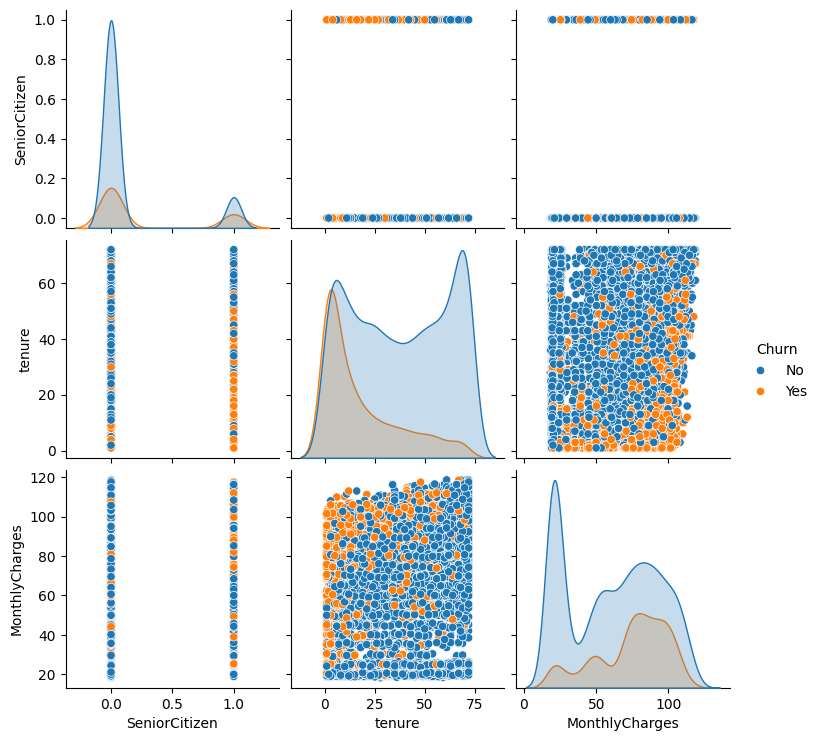

In [23]:
sns.pairplot(df, hue='Churn')
plt.show()

According to the variance result, all of these features should be kept because they all appear to have strong relationships to customer behaviour, which can be vital in predicting outcomes such as churn or other customer-related predictions. By retaining these features, we can preserve crucial predictive information for the machine learning models we will apply in this research project. 

#### 5 - Selection and Realtionship of Categorical Variables

For each categorical variable, I'm going to show the distribution of the Churn value for each category using boxplot. 

In [24]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [25]:
crosstabs = {col: pd.crosstab(df[col], df['Churn']) for col in categorical_cols}

for col, tab in crosstabs.items():
    print(f"Crosstab for {col} vs Churn:")
    print(tab)
    print("\n")

Crosstab for gender vs Churn:
Churn     No  Yes
gender           
Female  2541  934
Male    2612  923


Crosstab for Partner vs Churn:
Churn      No   Yes
Partner            
No       2429  1188
Yes      2724   669


Crosstab for Dependents vs Churn:
Churn         No   Yes
Dependents            
No          3380  1531
Yes         1773   326


Crosstab for PhoneService vs Churn:
Churn           No   Yes
PhoneService            
No             510   170
Yes           4643  1687


Crosstab for MultipleLines vs Churn:
Churn               No  Yes
MultipleLines              
No                2526  837
No phone service   510  170
Yes               2117  850


Crosstab for InternetService vs Churn:
Churn              No   Yes
InternetService            
DSL              1957   457
Fiber optic      1799  1291
No               1397   109


Crosstab for OnlineSecurity vs Churn:
Churn                  No   Yes
OnlineSecurity                 
No                   2036  1453
No internet service  13

#### 6 - Check for Class imbalance

It is important to identify if we have class imbalance in our dataset, to avoid misleading accuracy, to ensure proper representation of the minority class and it help us to make better data - driven decisions.

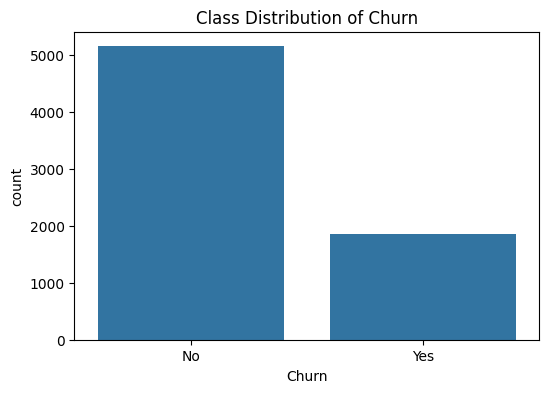

Class counts for Churn:
Churn
No     5153
Yes    1857
Name: count, dtype: int64

Class proportions for Churn (in %):
Churn
No     73.509272
Yes    26.490728
Name: count, dtype: float64


In [26]:
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Class Distribution of Churn')
plt.show()

churn_proportion = churn_counts / len(df) * 100
print("Class counts for Churn:")
print(churn_counts)
print("\nClass proportions for Churn (in %):")
print(churn_proportion)

From the results we can see that, there is a clear class imbalance in the dataset. Approximately 73.5% of the customers did not churn. 

#### 7 - Explore target variable

In [27]:
target = 'Churn'

In [28]:
df[target]

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7010, dtype: object

Distribution of two classes in the 'Churn' column.

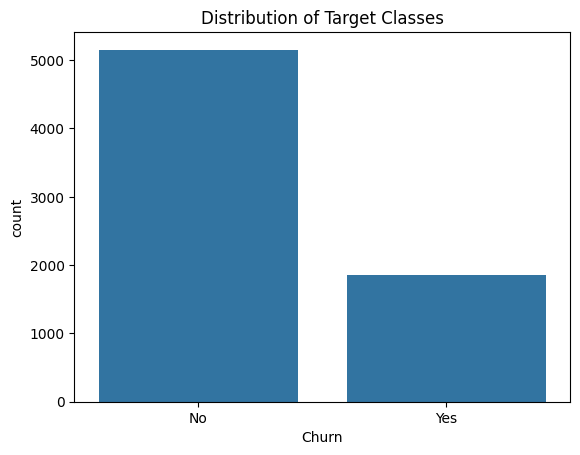

In [29]:
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Target Classes')
plt.show()

#### 8 - Prepare Data

In [30]:
def data_preprocessing(df,scaler=True):
  df_new = df.copy()

  # STEP 1 -> Delete customer ID because is not important in the analysis 
  df_new = df_new.drop(columns=['customerID'])

  # STEP 2 -> It's important to strip any leading/trailing spaces and convert empty values to NaN
  df_new['TotalCharges'] = df_new['TotalCharges'].replace(" ", np.nan)

  # STEP 3 -> Now we are going to convert with this line of code the 'TotalCharges' column to float
  df_new['TotalCharges'] = df_new['TotalCharges'].astype(float)

  # STEP 4 -> We are going to delete the nulls in this column 
  df_new = df_new.dropna(subset=['TotalCharges'])

  # STEP 5 -> We are going to drop the duplicate rows
  df_new = df_new.drop_duplicates()

  # STEP 6 -> We drop this column from the model 
  df_new = df_new.drop('TotalCharges', axis=1)

  df_new['Churn'] = df_new['Churn'].map({'Yes': 1, 'No': 0})

  if scaler:

    numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
    scaler = MinMaxScaler()
    df_new[numeric_cols] = scaler.fit_transform(df_new[numeric_cols])

    columns_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                          'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                          'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                          'PaperlessBilling', 'PaymentMethod']
      
    label_encoder = LabelEncoder()
      
    for col in columns_to_encode:
          df_new[col] = label_encoder.fit_transform(df_new[col])

  return df_new

train encoder for streamlit

In [53]:
df_original.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
data_preprocessing(df_original).head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0.0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0
1,1,0.0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0
2,1,0.0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,1
3,1,0.0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0
4,0,0.0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,1


#### 9 - Split Dataset

In this step it is vital to divide the dataset into a training, validation and testing set to be able to evaluate the performance of the model.

In [32]:
# STEP 1 -> Preprocessing the data for Logistic Regression with scaling
df_modeling_lr_rf = data_preprocessing(df_original, scaler=True)

#STEP 2 -> Preprocessing the data for CatBoost and Random Forest without scaling
df_modeling_cat = data_preprocessing(df_original, scaler=False)

In [33]:
# STEP 3 -> Definition of target and features for Logistic Regression
y_lr_rf = df_modeling_lr_rf['Churn']
X_lr_rf = df_modeling_lr_rf.drop('Churn', axis=1)

# STEP 4 -> Definition of target and features for CatBoost and Random Forest
y_cat = df_modeling_cat['Churn']
X_cat = df_modeling_cat.drop('Churn', axis=1)

In [34]:
# STEP 5 -> Modeling, test, and validation sets for Logistic Regression
X_model_lr_rf, X_test_lr_rf, y_model_lr_rf, y_test_lr_rf = train_test_split(X_lr_rf, y_lr_rf, test_size=0.20, random_state=42)
X_train_lr_rf, X_val_lr_rf, y_train_lr_rf, y_val_lr_rf = train_test_split(X_model_lr_rf, y_model_lr_rf, test_size=0.20, random_state=42)

X_model_cat, X_test_cat, y_model_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.20, random_state=42)
X_train_cat, X_val_cat, y_train_cat, y_val_cat = train_test_split(X_model_cat, y_model_cat, test_size=0.20, random_state=42)

#### 10 - Baseline Model

To compare with the models we are going to develop in this project

In [35]:
def compute_metrics(y_train, y_val, y_test, y_central_train, y_central_val, y_central_test):
    accuracy_train = accuracy_score(y_train, y_central_train)
    precision_train = precision_score(y_train, y_central_train, average='macro', zero_division=0)
    recall_train = recall_score(y_train, y_central_train, average='macro')
    f1_train = f1_score(y_train, y_central_train, average='macro')

    accuracy_val = accuracy_score(y_val, y_central_val)
    precision_val = precision_score(y_val, y_central_val, average='macro', zero_division=0)
    recall_val = recall_score(y_val, y_central_val, average='macro')
    f1_val = f1_score(y_val, y_central_val, average='macro')

    accuracy_test = accuracy_score(y_test, y_central_test)
    precision_test = precision_score(y_test, y_central_test, average='macro', zero_division=0)
    recall_test = recall_score(y_test, y_central_test, average='macro')
    f1_test = f1_score(y_test, y_central_test, average='macro')

    metrics_df = pd.DataFrame({
        'Data Split': ['Train', 'Validation', 'Test'],
        'Accuracy': [accuracy_train, accuracy_val, accuracy_test],
        'Precision': [precision_train, precision_val, precision_test],
        'Recall': [recall_train, recall_val, recall_test],
        'F1 Score': [f1_train, f1_val, f1_test]
    })

    return metrics_df

def baseline_model(df_modeling, target_column='Churn'):
    y = df_modeling[target_column]
    X = df_modeling.drop(target_column, axis=1)

    X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=42)

    mod = statistics.mode(y_train)

    y_central_train = np.full(y_train.shape, mod)
    y_central_val = np.full(y_val.shape, mod)
    y_central_test = np.full(y_test.shape, mod)

    metrics_df = compute_metrics(y_train, y_val, y_test, y_central_train, y_central_val, y_central_test)
    print(metrics_df)

df_modeling_linear = data_preprocessing(df_original, scaler=True) 
df_modeling_catboost_rf = data_preprocessing(df_original, scaler=False)  

print("Baseline Model - Logistic Regression")
baseline_model(df_modeling_linear, target_column='Churn')

print("\nBaseline Model - CatBoost/Random Forest")
baseline_model(df_modeling_catboost_rf, target_column='Churn')

Baseline Model - Logistic Regression
   Data Split  Accuracy  Precision  Recall  F1 Score
0       Train  0.726482   0.363241     0.5  0.420788
1  Validation  0.724599   0.362299     0.5  0.420155
2        Test  0.771041   0.385521     0.5  0.435360

Baseline Model - CatBoost/Random Forest
   Data Split  Accuracy  Precision  Recall  F1 Score
0       Train  0.726482   0.363241     0.5  0.420788
1  Validation  0.724599   0.362299     0.5  0.420155
2        Test  0.771041   0.385521     0.5  0.435360


#### 11 - Logistic Regression

Train of the model

In [36]:
# STEP 1 -> Create the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=200)

# STEP 2 -> Fit the model on the training data
log_reg.fit(X_train_lr_rf, y_train_lr_rf)

# STEP 3 -> Predictions on training, validation, and test sets
y_pred_train_lr_rf = log_reg.predict(X_train_lr_rf)
y_pred_val_lr_rf = log_reg.predict(X_val_lr_rf)
y_pred_test_lr_rf = log_reg.predict(X_test_lr_rf)

# STEP 4 -> Calculate the metrics for training set
accuracy_train_lr_rf = accuracy_score(y_train_lr_rf, y_pred_train_lr_rf)
precision_train_lr_rf = precision_score(y_train_lr_rf, y_pred_train_lr_rf, average='macro')
recall_train_lr_rf = recall_score(y_train_lr_rf, y_pred_train_lr_rf, average='macro')
f1_train_lr_rf = f1_score(y_train_lr_rf, y_pred_train_lr_rf, average='macro')

# STEP 5 -> Calculate the metrics for validation set
accuracy_val_lr_rf = accuracy_score(y_val_lr_rf, y_pred_val_lr_rf)
precision_val_lr_rf = precision_score(y_val_lr_rf, y_pred_val_lr_rf, average='macro')
recall_val_lr_rf = recall_score(y_val_lr_rf, y_pred_val_lr_rf, average='macro')
f1_val_lr_rf = f1_score(y_val_lr_rf, y_pred_val_lr_rf, average='macro')

# STEP 6 -> Calculate the metrics for test set
accuracy_test_lr_rf = accuracy_score(y_test_lr_rf, y_pred_test_lr_rf)
precision_test_lr_rf = precision_score(y_test_lr_rf, y_pred_test_lr_rf, average='macro')
recall_test_lr_rf = recall_score(y_test_lr_rf, y_pred_test_lr_rf, average='macro')
f1_test_lr_rf = f1_score(y_test_lr_rf, y_pred_test_lr_rf, average='macro')

# STEP 7 -> Print the results in a well-formatted way
print(f"--- Logistic Regression Model Results ---")

print(f"\nTraining Set Results")
print(f"Accuracy: {accuracy_train_lr_rf:.4f}")
print(f"Precision: {precision_train_lr_rf:.4f}")
print(f"Recall: {recall_train_lr_rf:.4f}")
print(f"F1 Score: {f1_train_lr_rf:.4f}")
print(" ")

print(f"Validation Set Results")
print(f"Accuracy: {accuracy_val_lr_rf:.4f}")
print(f"Precision: {precision_val_lr_rf:.4f}")
print(f"Recall: {recall_val_lr_rf:.4f}")
print(f"F1 Score: {f1_val_lr_rf:.4f}")
print(" ")

print(f"Test Set Results")
print(f"Accuracy: {accuracy_test_lr_rf:.4f}")
print(f"Precision: {precision_test_lr_rf:.4f}")
print(f"Recall: {recall_test_lr_rf:.4f}")
print(f"F1 Score: {f1_test_lr_rf:.4f}")

--- Logistic Regression Model Results ---

Training Set Results
Accuracy: 0.7969
Precision: 0.7475
Recall: 0.7152
F1 Score: 0.7276
 
Validation Set Results
Accuracy: 0.8066
Precision: 0.7605
Recall: 0.7361
F1 Score: 0.7463
 
Test Set Results
Accuracy: 0.8245
Precision: 0.7532
Recall: 0.7274
F1 Score: 0.7386


Tuning the model

In [37]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'solver': ['saga'],  
    'max_iter': [200, 500]  
}

# STEP 1 -> Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# STEP 2 -> Setup GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, 
                           scoring='f1_macro', cv=5, n_jobs=-1, verbose=2)

# STEP 3 -> Fit the GridSearchCV on the training data
grid_search.fit(X_train_lr_rf, y_train_lr_rf)

# STEP 4 -> Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation F1-Score: {best_score:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-Validation F1-Score: 0.7215


Assess model performance

In [38]:
best_params = {
    'penalty': 'l2',      
    'C': 1,               
    'solver': 'saga',      
    'max_iter': 200        
}

# STEP 1 -> Initialize Logistic Regression model with best parameters
log_reg_best = LogisticRegression(penalty=best_params['penalty'], 
                                  C=best_params['C'],
                                  solver=best_params['solver'],
                                  max_iter=best_params['max_iter'],
                                  random_state=42)

# STEP 2 -> Train the model on the training set
log_reg_best.fit(X_train_lr_rf, y_train_lr_rf)

# STEP 3 -> Predict on training, validation, and test sets
y_pred_train_lr_rf = log_reg_best.predict(X_train_lr_rf)
y_pred_val_lr_rf = log_reg_best.predict(X_val_lr_rf)
y_pred_test_lr_rf = log_reg_best.predict(X_test_lr_rf)

# STEP 4 -> Calculate the metrics for training set
accuracy_train_lr_rf = accuracy_score(y_train_lr_rf, y_pred_train_lr_rf)
precision_train_lr_rf = precision_score(y_train_lr_rf, y_pred_train_lr_rf, average='macro')
recall_train_lr_rf = recall_score(y_train_lr_rf, y_pred_train_lr_rf, average='macro')
f1_train_lr_rf = f1_score(y_train_lr_rf, y_pred_train_lr_rf, average='macro')

# STEP 5 -> Calculate the metrics for validation set
accuracy_val_lr_rf = accuracy_score(y_val_lr_rf, y_pred_val_lr_rf)
precision_val_lr_rf = precision_score(y_val_lr_rf, y_pred_val_lr_rf, average='macro')
recall_val_lr_rf = recall_score(y_val_lr_rf, y_pred_val_lr_rf, average='macro')
f1_val_lr_rf = f1_score(y_val_lr_rf, y_pred_val_lr_rf, average='macro')

# STEP 6 -> Calculate the metrics for test set
accuracy_test_lr_rf = accuracy_score(y_test_lr_rf, y_pred_test_lr_rf)
precision_test_lr_rf = precision_score(y_test_lr_rf, y_pred_test_lr_rf, average='macro')
recall_test_lr_rf = recall_score(y_test_lr_rf, y_pred_test_lr_rf, average='macro')
f1_test_lr_rf = f1_score(y_test_lr_rf, y_pred_test_lr_rf, average='macro')

# STEP 7 -> Print the results in a well-formatted way
print(f"\n--- Logistic Regression Model Results with Best Parameters ---")

print(f"\nTraining Set Results")
print(f"Accuracy: {accuracy_train_lr_rf:.4f}")
print(f"Precision: {precision_train_lr_rf:.4f}")
print(f"Recall: {recall_train_lr_rf:.4f}")
print(f"F1 Score: {f1_train_lr_rf:.4f}")
print(" ")

print(f"Validation Set Results")
print(f"Accuracy: {accuracy_val_lr_rf:.4f}")
print(f"Precision: {precision_val_lr_rf:.4f}")
print(f"Recall: {recall_val_lr_rf:.4f}")
print(f"F1 Score: {f1_val_lr_rf:.4f}")
print(" ")

print(f"Test Set Results")
print(f"Accuracy: {accuracy_test_lr_rf:.4f}")
print(f"Precision: {precision_test_lr_rf:.4f}")
print(f"Recall: {recall_test_lr_rf:.4f}")
print(f"F1 Score: {f1_test_lr_rf:.4f}")


--- Logistic Regression Model Results with Best Parameters ---

Training Set Results
Accuracy: 0.7969
Precision: 0.7475
Recall: 0.7152
F1 Score: 0.7276
 
Validation Set Results
Accuracy: 0.8066
Precision: 0.7605
Recall: 0.7361
F1 Score: 0.7463
 
Test Set Results
Accuracy: 0.8245
Precision: 0.7532
Recall: 0.7274
F1 Score: 0.7386


#### ROC Curve

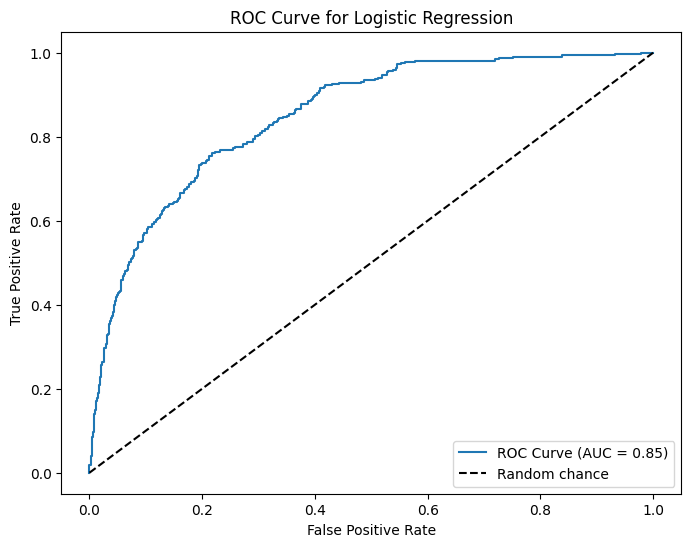

In [39]:
# STEP 1 -> Get predicted probabilities for test set (class 1 probabilities)
log_reg.fit(X_train_lr_rf, y_train_lr_rf)
y_probs_test_lr_rf = log_reg.predict_proba(X_test_lr_rf)[:, 1]

# STEP 2 -> Compute FPR, TPR, and thresholds for the ROC curve
fpr_test_lr_rf, tpr_test_lr_rf, thresholds_test_lr_rf = roc_curve(y_test_lr_rf, y_probs_test_lr_rf)

# STEP 3 -> Compute the ROC AUC score
roc_auc_test_lr_rf = roc_auc_score(y_test_lr_rf, y_probs_test_lr_rf)

# STEP 4 -> Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_lr_rf, tpr_test_lr_rf, label=f'ROC Curve (AUC = {roc_auc_test_lr_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')

# Formatting the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')

# Show plot
plt.show()

Another informative visualisation is the confusion matrix, which shows true positives, false positives, true negatives, and false negatives.

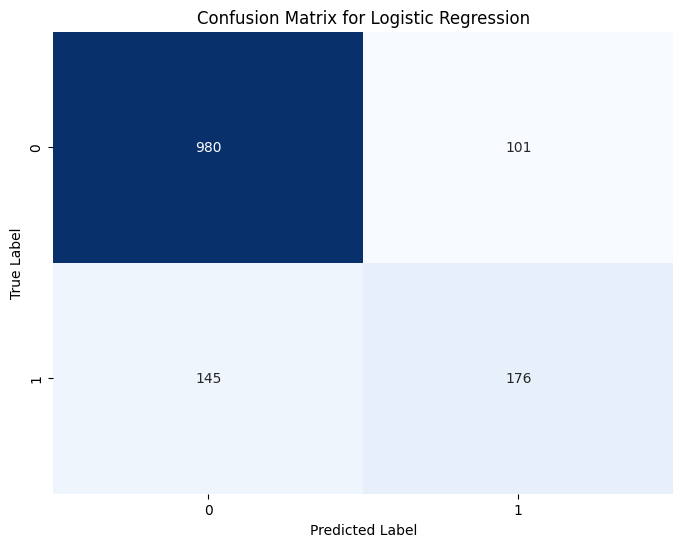

In [40]:
# STEP 1 -> Predict on the test set
y_pred_test_lr_rf = log_reg.predict(X_test_lr_rf)

# STEP 2 -> Create confusion matrix
cm_test_lr_rf = confusion_matrix(y_test_lr_rf, y_pred_test_lr_rf)

# STEP 3 -> Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_lr_rf, annot=True, fmt='d', cmap='Blues', cbar=False)

# Formatting the plot
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')

plt.show()

#### 12 - CatBoost

Train of the model.

In [41]:
# STEP 1 -> Identify the categorical columns
cat_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                'PaperlessBilling', 'PaymentMethod']

# STEP 2 -> Create the CatBoost model
catboost_model = CatBoostClassifier(random_state=42, iterations=200, silent=True)

# STEP 3 -> Fit the model on the training data, passing the categorical features
catboost_model.fit(X_train_cat, y_train_cat, cat_features=cat_features)

# STEP 4 -> Predictions on training, validation, and test sets
y_pred_train_cat = catboost_model.predict(X_train_cat)
y_pred_val_cat = catboost_model.predict(X_val_cat)
y_pred_test_cat = catboost_model.predict(X_test_cat)

# STEP 5 -> Calculate the metrics for training set
accuracy_train_cat = accuracy_score(y_train_cat, y_pred_train_cat)
precision_train_cat = precision_score(y_train_cat, y_pred_train_cat, average='macro')
recall_train_cat = recall_score(y_train_cat, y_pred_train_cat, average='macro')
f1_train_cat = f1_score(y_train_cat, y_pred_train_cat, average='macro')

# STEP 6 -> Calculate the metrics for validation set
accuracy_val_cat = accuracy_score(y_val_cat, y_pred_val_cat)
precision_val_cat = precision_score(y_val_cat, y_pred_val_cat, average='macro')
recall_val_cat = recall_score(y_val_cat, y_pred_val_cat, average='macro')
f1_val_cat = f1_score(y_val_cat, y_pred_val_cat, average='macro')

# STEP 7 -> Calculate the metrics for test set
accuracy_test_cat = accuracy_score(y_test_cat, y_pred_test_cat)
precision_test_cat = precision_score(y_test_cat, y_pred_test_cat, average='macro')
recall_test_cat = recall_score(y_test_cat, y_pred_test_cat, average='macro')
f1_test_cat = f1_score(y_test_cat, y_pred_test_cat, average='macro')

# STEP 8 -> Print the results in a well-formatted way
print(f"--- CatBoost Model Results ---")

print(f"\nTraining Set Results")
print(f"Accuracy: {accuracy_train_cat:.4f}")
print(f"Precision: {precision_train_cat:.4f}")
print(f"Recall: {recall_train_cat:.4f}")
print(f"F1 Score: {f1_train_cat:.4f}")
print(" ")

print(f"Validation Set Results")
print(f"Accuracy: {accuracy_val_cat:.4f}")
print(f"Precision: {precision_val_cat:.4f}")
print(f"Recall: {recall_val_cat:.4f}")
print(f"F1 Score: {f1_val_cat:.4f}")
print(" ")

print(f"Test Set Results")
print(f"Accuracy: {accuracy_test_cat:.4f}")
print(f"Precision: {precision_test_cat:.4f}")
print(f"Recall: {recall_test_cat:.4f}")
print(f"F1 Score: {f1_test_cat:.4f}")

--- CatBoost Model Results ---

Training Set Results
Accuracy: 0.8277
Precision: 0.7952
Recall: 0.7480
F1 Score: 0.7656
 
Validation Set Results
Accuracy: 0.8030
Precision: 0.7591
Recall: 0.7196
F1 Score: 0.7342
 
Test Set Results
Accuracy: 0.8203
Precision: 0.7479
Recall: 0.7115
F1 Score: 0.7261


Tuning the model

In [42]:
# STEP 1 -> Define the parameter grid for CatBoost tuning
param_grid = {
    'depth': [4, 6, 8],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'iterations': [50, 100],  
    'l2_leaf_reg': [1, 3]  
}

# STEP 2 -> Initialize the CatBoost model
catboost_model = CatBoostClassifier(random_state=42, silent=True)

# STEP 3 -> Setup GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, 
                            scoring='f1_macro', cv=5, n_jobs=-1, verbose=2)

# STEP 4 -> Fit the GridSearchCV on the training data (use the categorical features argument)
grid_search.fit(X_train_cat, y_train_cat, cat_features=cat_features)

# STEP 5 -> Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and score
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation F1-Score: {best_score:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best Cross-Validation F1-Score: 0.7301


Assess model performance

In [43]:
# STEP 1 -> Initialize the CatBoost model with the best parameters
catboost_model_best = CatBoostClassifier(
    depth=6,
    iterations=100,
    l2_leaf_reg=1,
    learning_rate=0.1,
    random_state=42,
    silent=True
)

# STEP 2 -> Fit the model on the training data
catboost_model_best.fit(X_train_cat, y_train_cat, cat_features=cat_features)

# STEP 3 -> Predictions on training, validation, and test sets
y_pred_train_cat = catboost_model_best.predict(X_train_cat)
y_pred_val_cat = catboost_model_best.predict(X_val_cat)
y_pred_test_cat = catboost_model_best.predict(X_test_cat)

# STEP 4 -> Calculate the metrics for training set
accuracy_train_cat = accuracy_score(y_train_cat, y_pred_train_cat)
precision_train_cat = precision_score(y_train_cat, y_pred_train_cat, average='macro')
recall_train_cat = recall_score(y_train_cat, y_pred_train_cat, average='macro')
f1_train_cat = f1_score(y_train_cat, y_pred_train_cat, average='macro')

# STEP 5 -> Calculate the metrics for validation set
accuracy_val_cat = accuracy_score(y_val_cat, y_pred_val_cat)
precision_val_cat = precision_score(y_val_cat, y_pred_val_cat, average='macro')
recall_val_cat = recall_score(y_val_cat, y_pred_val_cat, average='macro')
f1_val_cat = f1_score(y_val_cat, y_pred_val_cat, average='macro')

# STEP 6 -> Calculate the metrics for test set
accuracy_test_cat = accuracy_score(y_test_cat, y_pred_test_cat)
precision_test_cat = precision_score(y_test_cat, y_pred_test_cat, average='macro')
recall_test_cat = recall_score(y_test_cat, y_pred_test_cat, average='macro')
f1_test_cat = f1_score(y_test_cat, y_pred_test_cat, average='macro')

# STEP 7 -> Print the results in a well-formatted way
print(f"--- CatBoost Model Results with Best Parameters ---")

print(f"\nTraining Set Results")
print(f"Accuracy: {accuracy_train_cat:.4f}")
print(f"Precision: {precision_train_cat:.4f}")
print(f"Recall: {recall_train_cat:.4f}")
print(f"F1 Score: {f1_train_cat:.4f}")
print(" ")

print(f"Validation Set Results")
print(f"Accuracy: {accuracy_val_cat:.4f}")
print(f"Precision: {precision_val_cat:.4f}")
print(f"Recall: {recall_val_cat:.4f}")
print(f"F1 Score: {f1_val_cat:.4f}")
print(" ")

print(f"Test Set Results")
print(f"Accuracy: {accuracy_test_cat:.4f}")
print(f"Precision: {precision_test_cat:.4f}")
print(f"Recall: {recall_test_cat:.4f}")
print(f"F1 Score: {f1_test_cat:.4f}")

--- CatBoost Model Results with Best Parameters ---

Training Set Results
Accuracy: 0.8132
Precision: 0.7715
Recall: 0.7345
F1 Score: 0.7487
 
Validation Set Results
Accuracy: 0.8030
Precision: 0.7558
Recall: 0.7307
F1 Score: 0.7410
 
Test Set Results
Accuracy: 0.8295
Precision: 0.7612
Recall: 0.7340
F1 Score: 0.7457


ROC Curve

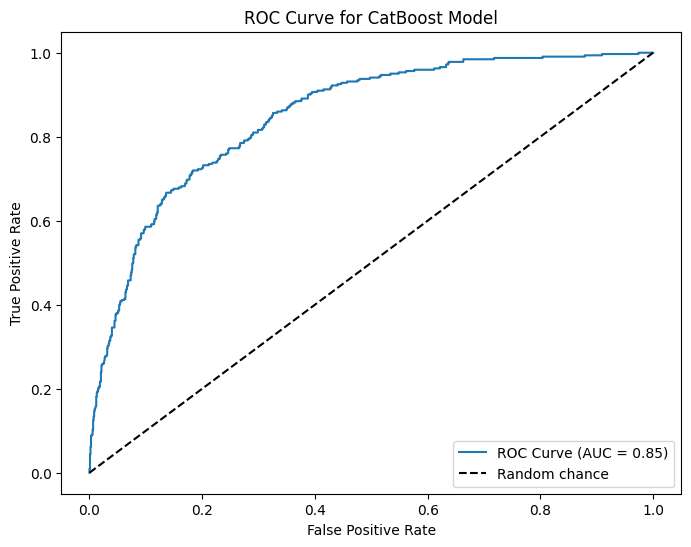

In [44]:
# STEP 1 -> Get predicted probabilities for test set (class 1 probabilities)
y_probs_test_cat = catboost_model_best.predict_proba(X_test_cat)[:, 1]

# STEP 2 -> Compute FPR, TPR, and thresholds for the ROC curve
fpr_test_cat, tpr_test_cat, thresholds_test_cat = roc_curve(y_test_cat, y_probs_test_cat)

# STEP 3 -> Compute the ROC AUC score
roc_auc_test_cat = roc_auc_score(y_test_cat, y_probs_test_cat)

# STEP 4 -> Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_cat, tpr_test_cat, label=f'ROC Curve (AUC = {roc_auc_test_cat:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')

# Formatting the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CatBoost Model')
plt.legend(loc='lower right')

# Show plot
plt.show()

Another informative visualisation is the confusion matrix, which shows true positives, false positives, true negatives, and false negatives.

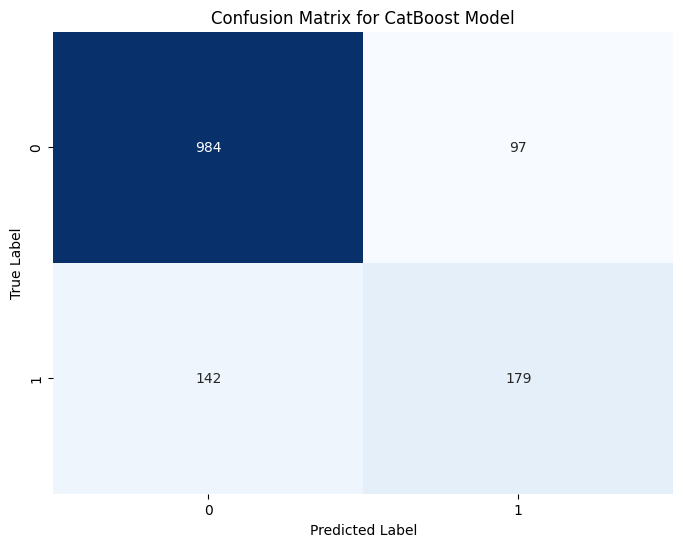

In [45]:
# STEP 1 -> Predict on the test set
y_pred_test_cat = catboost_model_best.predict(X_test_cat)

# STEP 2 -> Create confusion matrix
cm_test_cat = confusion_matrix(y_test_cat, y_pred_test_cat)

# STEP 3 -> Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_cat, annot=True, fmt='d', cmap='Blues', cbar=False)

# Formatting the plot
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CatBoost Model')

# Show plot
plt.show()

export catboost

In [55]:
model_name = 'Catboost'
output_model_filepath = f'../models/{model_name}_model.pkl'

os.makedirs(os.path.dirname(output_model_filepath), exist_ok=True)

joblib.dump(catboost_model_best, output_model_filepath)

['../models/Catboost_model.pkl']

#### 13 - Random Forest

Train model

In [46]:
# STEP 1 -> Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)

# STEP 2 -> Fit the model on the training data
rf_model.fit(X_train_lr_rf, y_train_lr_rf)

# STEP 3 -> Predictions on training, validation, and test sets
y_pred_train_lr_rf = rf_model.predict(X_train_lr_rf)
y_pred_val_lr_rf = rf_model.predict(X_val_lr_rf)
y_pred_test_lr_rf = rf_model.predict(X_test_lr_rf)

# STEP 4 -> Calculate the metrics for the training set
accuracy_train_lr_rf = accuracy_score(y_train_lr_rf, y_pred_train_lr_rf)
precision_train_lr_rf = precision_score(y_train_lr_rf, y_pred_train_lr_rf, average='macro')
recall_train_lr_rf = recall_score(y_train_lr_rf, y_pred_train_lr_rf, average='macro')
f1_train_lr_rf = f1_score(y_train_lr_rf, y_pred_train_lr_rf, average='macro')

# STEP 5 -> Calculate the metrics for the validation set
accuracy_val_lr_rf = accuracy_score(y_val_lr_rf, y_pred_val_lr_rf)
precision_val_lr_rf = precision_score(y_val_lr_rf, y_pred_val_lr_rf, average='macro')
recall_val_lr_rf = recall_score(y_val_lr_rf, y_pred_val_lr_rf, average='macro')
f1_val_lr_rf = f1_score(y_val_lr_rf, y_pred_val_lr_rf, average='macro')

# STEP 6 -> Calculate the metrics for the test set
accuracy_test_lr_rf = accuracy_score(y_test_lr_rf, y_pred_test_lr_rf)
precision_test_lr_rf = precision_score(y_test_lr_rf, y_pred_test_lr_rf, average='macro')
recall_test_lr_rf = recall_score(y_test_lr_rf, y_pred_test_lr_rf, average='macro')
f1_test_lr_rf = f1_score(y_test_lr_rf, y_pred_test_lr_rf, average='macro')

# STEP 7 -> Print the results in a well-formatted way
print(f"--- Random Forest Model Results ---")

print(f"\nTraining Set Results")
print(f"Accuracy: {accuracy_train_lr_rf:.4f}")
print(f"Precision: {precision_train_lr_rf:.4f}")
print(f"Recall: {recall_train_lr_rf:.4f}")
print(f"F1 Score: {f1_train_lr_rf:.4f}")
print(" ")

print(f"Validation Set Results")
print(f"Accuracy: {accuracy_val_lr_rf:.4f}")
print(f"Precision: {precision_val_lr_rf:.4f}")
print(f"Recall: {recall_val_lr_rf:.4f}")
print(f"F1 Score: {f1_val_lr_rf:.4f}")
print(" ")

print(f"Test Set Results")
print(f"Accuracy: {accuracy_test_lr_rf:.4f}")
print(f"Precision: {precision_test_lr_rf:.4f}")
print(f"Recall: {recall_test_lr_rf:.4f}")
print(f"F1 Score: {f1_test_lr_rf:.4f}")

--- Random Forest Model Results ---

Training Set Results
Accuracy: 0.8975
Precision: 0.8805
Recall: 0.8555
F1 Score: 0.8667
 
Validation Set Results
Accuracy: 0.7959
Precision: 0.7465
Recall: 0.7187
F1 Score: 0.7298
 
Test Set Results
Accuracy: 0.8124
Precision: 0.7340
Recall: 0.7141
F1 Score: 0.7228


Tuning the model

In [47]:
# STEP 1 -> Define the parameter grid for Random Forest tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, 30], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}

# STEP 2 -> Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# STEP 3 -> Setup GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                              scoring='f1_macro', cv=5, n_jobs=-1, verbose=2)

# STEP 4 -> Fit the GridSearchCV on the training data
grid_search_rf.fit(X_train_lr_rf, y_train_lr_rf)

# STEP 5 -> Get the best parameters and the best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Print the best parameters and score
print(f"Best Parameters: {best_params_rf}")
print(f"Best Cross-Validation F1-Score: {best_score_rf:.4f}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation F1-Score: 0.7203


Assess model performance

In [48]:
# STEP 1 -> Initialize the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(bootstrap=True, max_depth=10, 
                                       min_samples_leaf=1, min_samples_split=2, 
                                       n_estimators=300, random_state=42)

# STEP 2 -> Fit the model on the training data
best_rf_model.fit(X_train_lr_rf, y_train_lr_rf)

# STEP 3 -> Predictions on training, validation, and test sets
y_pred_train_rf = best_rf_model.predict(X_train_lr_rf)
y_pred_val_rf = best_rf_model.predict(X_val_lr_rf)
y_pred_test_rf = best_rf_model.predict(X_test_lr_rf)

# STEP 4 -> Calculate the metrics for training set
accuracy_train_rf = accuracy_score(y_train_lr_rf, y_pred_train_rf)
precision_train_rf = precision_score(y_train_lr_rf, y_pred_train_rf, average='macro')
recall_train_rf = recall_score(y_train_lr_rf, y_pred_train_rf, average='macro')
f1_train_rf = f1_score(y_train_lr_rf, y_pred_train_rf, average='macro')

# STEP 5 -> Calculate the metrics for validation set
accuracy_val_rf = accuracy_score(y_val_lr_rf, y_pred_val_rf)
precision_val_rf = precision_score(y_val_lr_rf, y_pred_val_rf, average='macro')
recall_val_rf = recall_score(y_val_lr_rf, y_pred_val_rf, average='macro')
f1_val_rf = f1_score(y_val_lr_rf, y_pred_val_rf, average='macro')

# STEP 6 -> Calculate the metrics for test set
accuracy_test_rf = accuracy_score(y_test_lr_rf, y_pred_test_rf)
precision_test_rf = precision_score(y_test_lr_rf, y_pred_test_rf, average='macro')
recall_test_rf = recall_score(y_test_lr_rf, y_pred_test_rf, average='macro')
f1_test_rf = f1_score(y_test_lr_rf, y_pred_test_rf, average='macro')

# STEP 7 -> Print the results in a well-formatted way
print(f"--- Random Forest Model Results with Best Parameters ---")

print(f"\nTraining Set Results")
print(f"Accuracy: {accuracy_train_rf:.4f}")
print(f"Precision: {precision_train_rf:.4f}")
print(f"Recall: {recall_train_rf:.4f}")
print(f"F1 Score: {f1_train_rf:.4f}")
print(" ")

print(f"Validation Set Results")
print(f"Accuracy: {accuracy_val_rf:.4f}")
print(f"Precision: {precision_val_rf:.4f}")
print(f"Recall: {recall_val_rf:.4f}")
print(f"F1 Score: {f1_val_rf:.4f}")
print(" ")

print(f"Test Set Results")
print(f"Accuracy: {accuracy_test_rf:.4f}")
print(f"Precision: {precision_test_rf:.4f}")
print(f"Recall: {recall_test_rf:.4f}")
print(f"F1 Score: {f1_test_rf:.4f}")

--- Random Forest Model Results with Best Parameters ---

Training Set Results
Accuracy: 0.8968
Precision: 0.8803
Recall: 0.8538
F1 Score: 0.8656
 
Validation Set Results
Accuracy: 0.8004
Precision: 0.7534
Recall: 0.7218
F1 Score: 0.7341
 
Test Set Results
Accuracy: 0.8174
Precision: 0.7418
Recall: 0.7195
F1 Score: 0.7292


ROC Curve

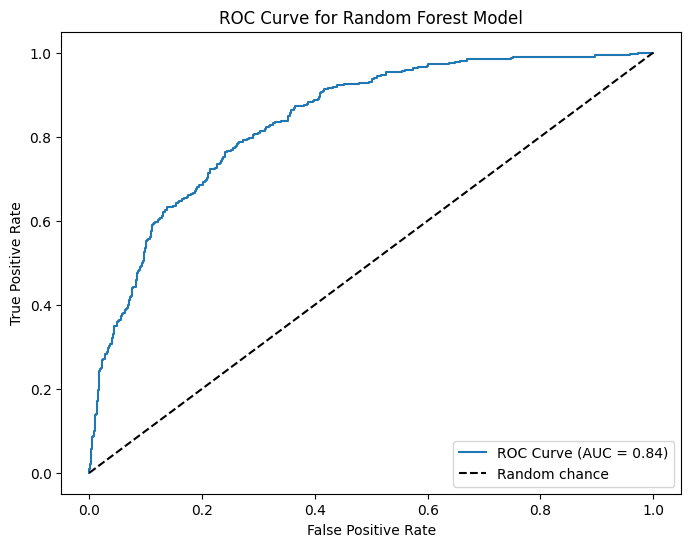

In [49]:
# STEP 1 -> Get predicted probabilities for test set (class 1 probabilities)
y_probs_test_rf = best_rf_model.predict_proba(X_test_lr_rf)[:, 1]

# STEP 2 -> Compute FPR, TPR, and thresholds for the ROC curve
fpr_test_rf, tpr_test_rf, thresholds_test_rf = roc_curve(y_test_lr_rf, y_probs_test_rf)

# STEP 3 -> Compute the ROC AUC score
roc_auc_test_rf = roc_auc_score(y_test_lr_rf, y_probs_test_rf)

# STEP 4 -> Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_rf, tpr_test_rf, label=f'ROC Curve (AUC = {roc_auc_test_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')

# Formatting the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='lower right')

# Show plot
plt.show()

Another informative visualisation is the confusion matrix, which shows true positives, false positives, true negatives, and false negatives.

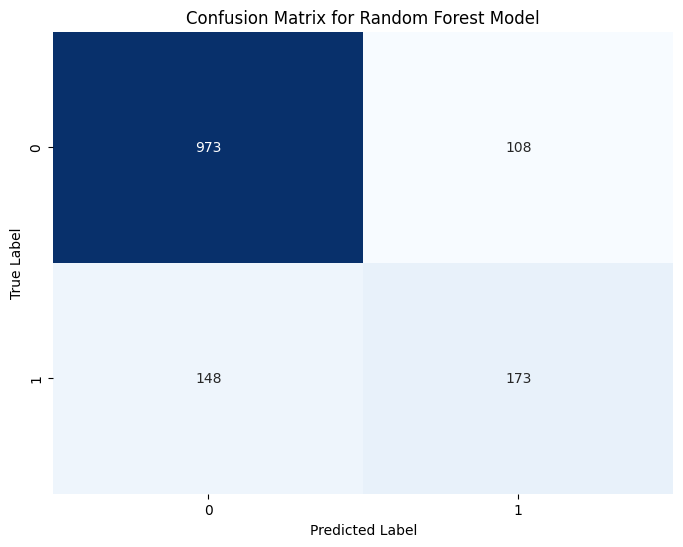

In [50]:
# STEP 1 -> Predict on the test set
y_pred_test_rf = best_rf_model.predict(X_test_lr_rf)

# STEP 2 -> Create confusion matrix
cm_test_rf = confusion_matrix(y_test_lr_rf, y_pred_test_rf)

# STEP 3 -> Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues', cbar=False)

# Formatting the plot
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')

# Show plot
plt.show()

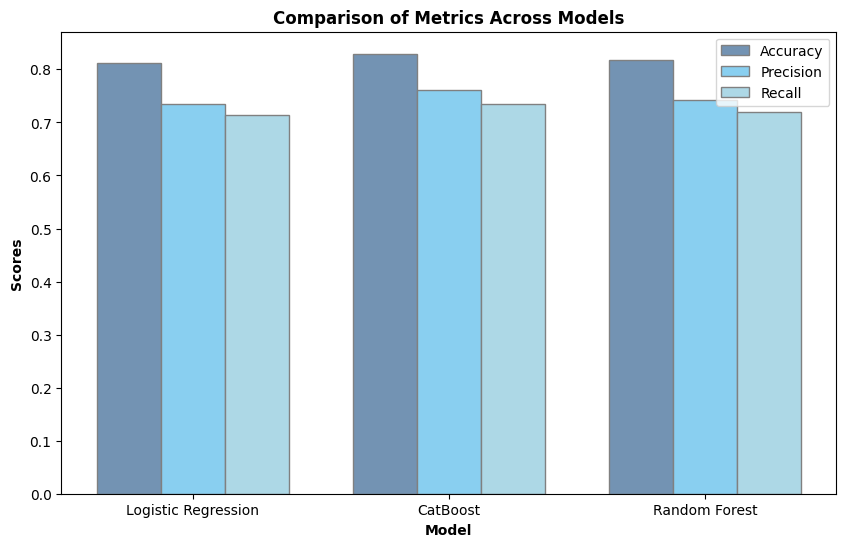

In [51]:
accuracy = [accuracy_test_lr_rf, accuracy_test_cat, accuracy_test_rf]  
precision = [precision_test_lr_rf, precision_test_cat, precision_test_rf]  
recall = [recall_test_lr_rf, recall_test_cat, recall_test_rf]  

models = ['Logistic Regression', 'CatBoost', 'Random Forest']

bar_width = 0.25

r1 = np.arange(len(accuracy))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy, color='#7393B3', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='#89CFF0', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='#ADD8E6', width=bar_width, edgecolor='grey', label='Recall')

plt.xlabel('Model', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(accuracy))], models)
plt.title('Comparison of Metrics Across Models', fontweight='bold')

plt.legend()

plt.show()

Comparision between recall of the diferent models.

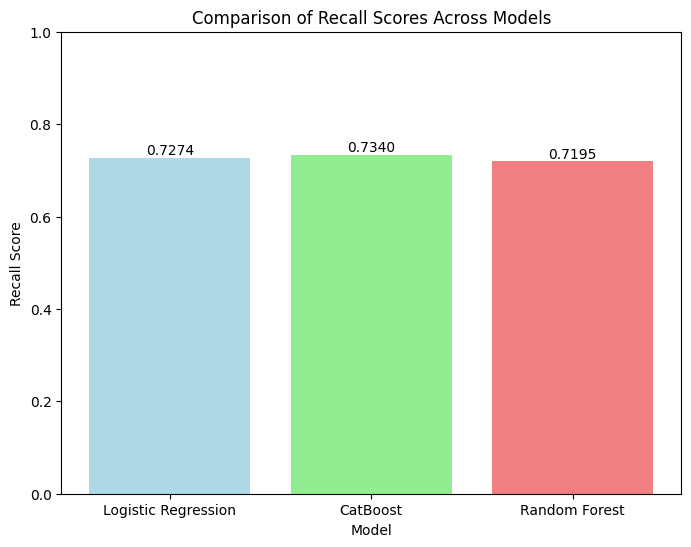

In [52]:
recall_scores = [0.7274, 0.7340, 0.7195]
models = ['Logistic Regression', 'CatBoost', 'Random Forest']

plt.figure(figsize=(8, 6))
bars = plt.bar(models, recall_scores, color=['lightblue', 'lightgreen', 'lightcoral'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.title('Comparison of Recall Scores Across Models')
plt.ylim(0, 1)

plt.show()

| Model               | Data Split   | Accuracy | Precision | Recall  | F1 Score |
|---------------------|--------------|----------|-----------|---------|----------|
| **Logistic Regression - Baseline** | Train       | 0.7265   | 0.3632    | 0.5000  | 0.4208   |
|                     | Validation   | 0.7246   | 0.3623    | 0.5000  | 0.4206   |
|                     | Test         | 0.7710   | 0.3855    | 0.5000  | 0.4354   |
| **Logistic Regression - Model**    | Train       | 0.7969   | 0.7475    | 0.7152  | 0.7276   |
|                     | Validation   | 0.8066   | 0.7605    | 0.7361  | 0.7463   |
|                     | Test         | 0.8245   | 0.7532    | 0.7274  | 0.7386   |
| **Logistic Regression - Best Params** | Train    | 0.7969   | 0.7475    | 0.7152  | 0.7276   |
|                     | Validation   | 0.8066   | 0.7605    | 0.7361  | 0.7463   |
|                     | Test         | 0.8245   | 0.7532    | 0.7274  | 0.7386   |
|---------------------|--------------|----------|-----------|---------|----------|
| **CatBoost - Baseline** | Train       | 0.7265   | 0.3632    | 0.5000  | 0.4208   |
|                     | Validation   | 0.7246   | 0.3623    | 0.5000  | 0.4206   |
|                     | Test         | 0.7710   | 0.3855    | 0.5000  | 0.4354   |
| **CatBoost - Model**    | Train       | 0.8277   | 0.7952    | 0.7480  | 0.7656   |
|                     | Validation   | 0.8030   | 0.7591    | 0.7196  | 0.7342   |
|                     | Test         | 0.8203   | 0.7479    | 0.7115  | 0.7261   |
| **CatBoost - Best Params** | Train    | 0.8132   | 0.7715    | 0.7345  | 0.7487   |
|                     | Validation   | 0.8030   | 0.7558    | 0.7307  | 0.7410   |
|                     | Test         | 0.8295   | 0.7612    | 0.7340  | 0.7457   |
|---------------------|--------------|----------|-----------|---------|----------|
| **Random Forest - Baseline** | Train       | 0.7265   | 0.3632    | 0.5000  | 0.4208   |
|                     | Validation   | 0.7246   | 0.3623    | 0.5000  | 0.4206   |
|                     | Test         | 0.7710   | 0.3855    | 0.5000  | 0.4354   |
| **Random Forest - Model**    | Train       | 0.8975   | 0.8805    | 0.8555  | 0.8667   |
|                     | Validation   | 0.7959   | 0.7465    | 0.7187  | 0.7298   |
|                     | Test         | 0.8124   | 0.7340    | 0.7141  | 0.7228   |
| **Random Forest - Best Params** | Train    | 0.8968   | 0.8803    | 0.8538  | 0.8656   |
|                     | Validation   | 0.8004   | 0.7534    | 0.7218  | 0.7341   |
|                     | Test         | 0.8174   | 0.7418    | 0.7195  | 0.7292   |